In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Experiment analysis

In [30]:
from results.experiment_analysis import create_experiment_dataframe, plot_success_rates, plot_circuit_complexity, plot_error_analysis, plot_cap_scores


Payload size distribution:
payload_size
1    47
2    48
3    47
4    48
dtype: int64

Counts distribution by payload size:

Payload size 1:
Average counts_zeros: 2089.32
Average counts_ones: 2006.68

Payload size 2:
Average counts_zeros: 1186.04
Average counts_ones: 2909.96

Payload size 3:
Average counts_zeros: 537.15
Average counts_ones: 3471.70

Payload size 4:
Average counts_zeros: 265.27
Average counts_ones: 3830.73

Regression Statistics (Linear Scale):
--------------------------------------------------

Payload Size 1:
Slope: -3.91e-04 ± 3.22e-04
Intercept: 52.16
R²: 0.032
p-value: 2.31e-01
--------------------------------------------------

Payload Size 2:
Slope: -7.69e-04 ± 3.06e-04
Intercept: 31.19
R²: 0.120
p-value: 1.57e-02
--------------------------------------------------

Payload Size 3:
Slope: nan ± nan
Intercept: nan
R²: nan
p-value: nan
--------------------------------------------------

Payload Size 4:
Slope: -3.05e-05 ± 5.19e-05
Intercept: 6.56
R²: 0.007
p-value: 5

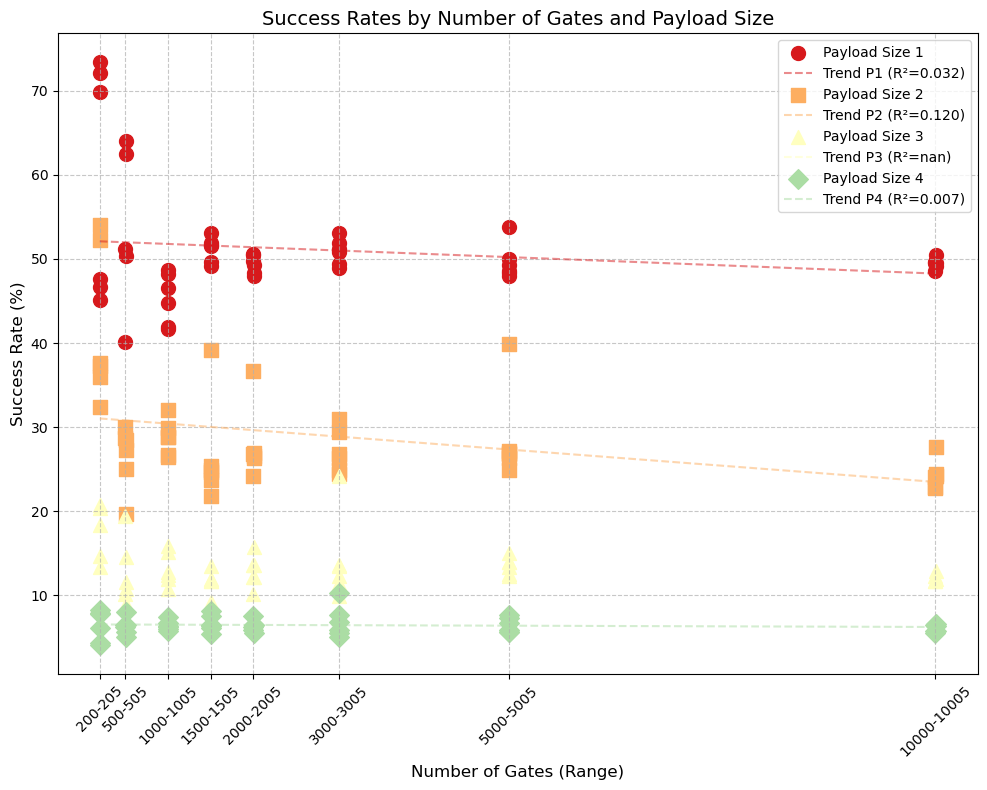

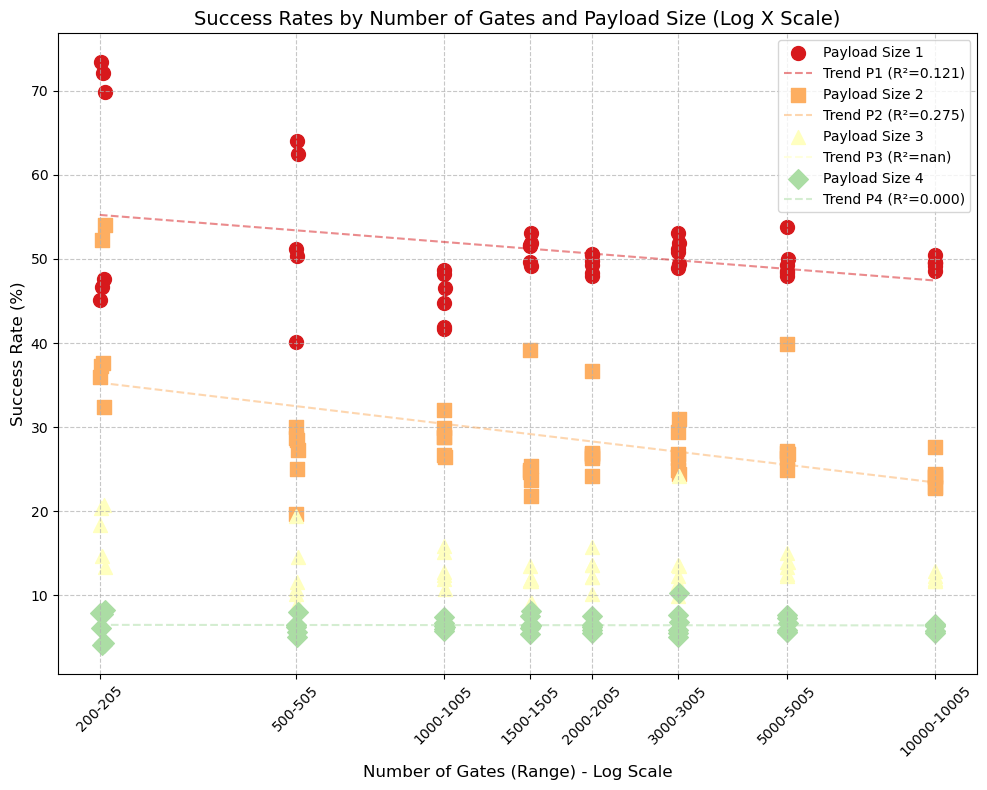

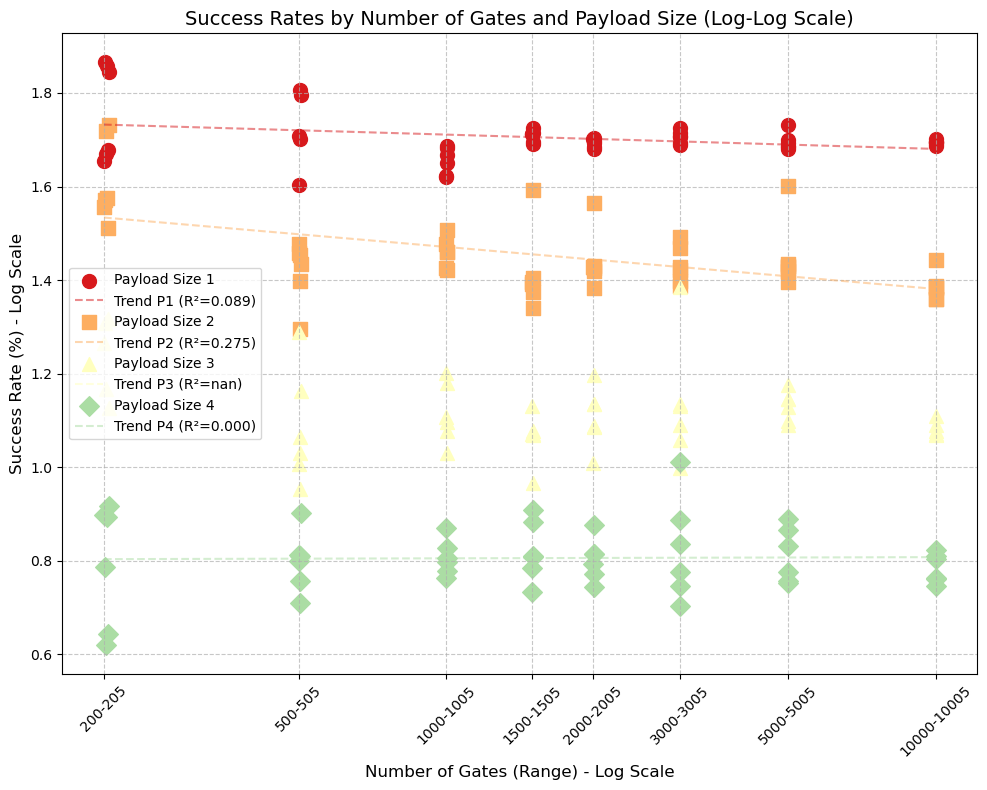

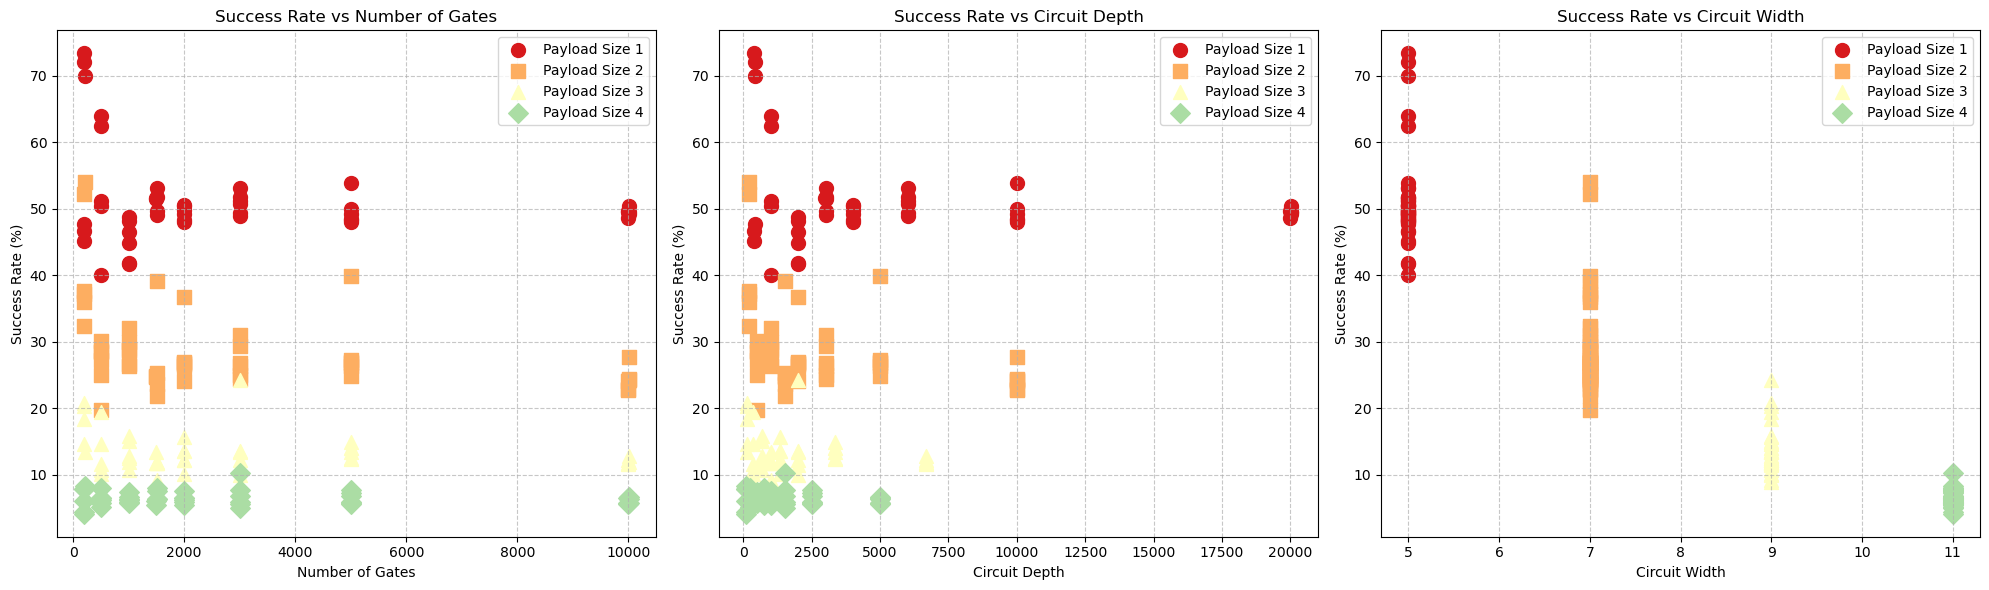

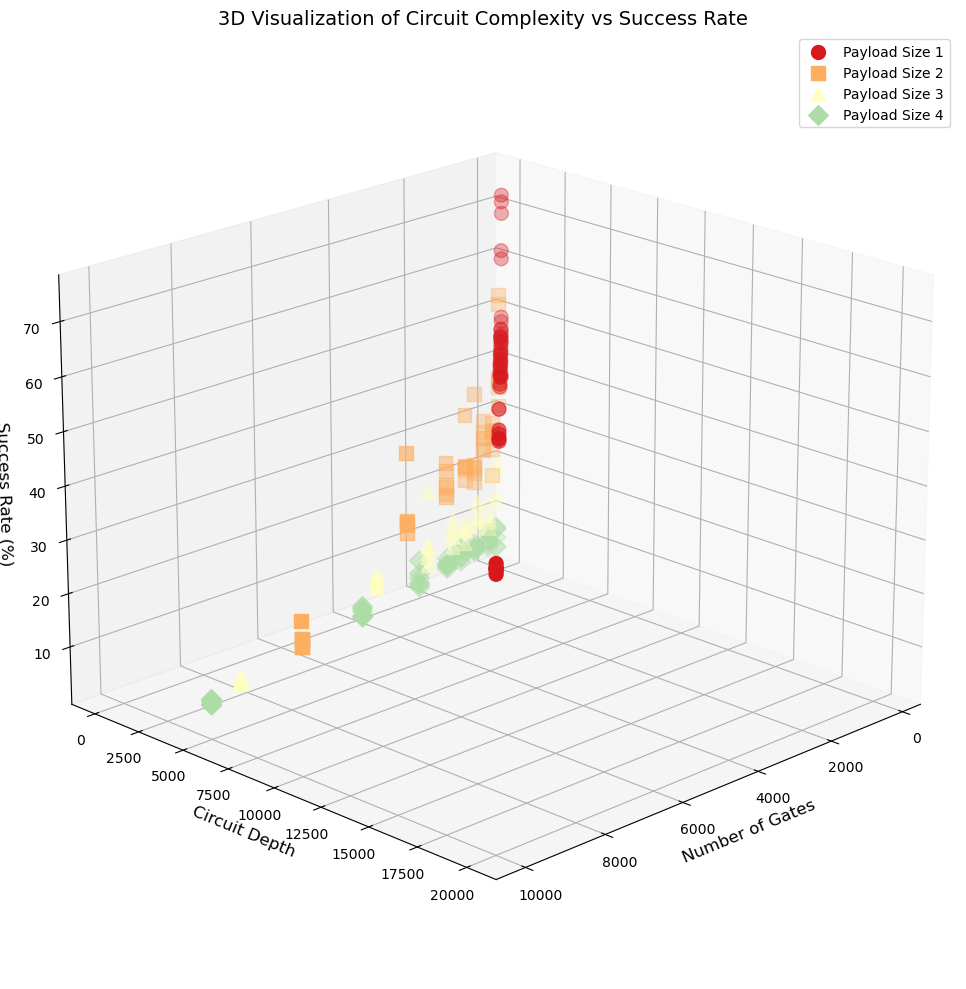

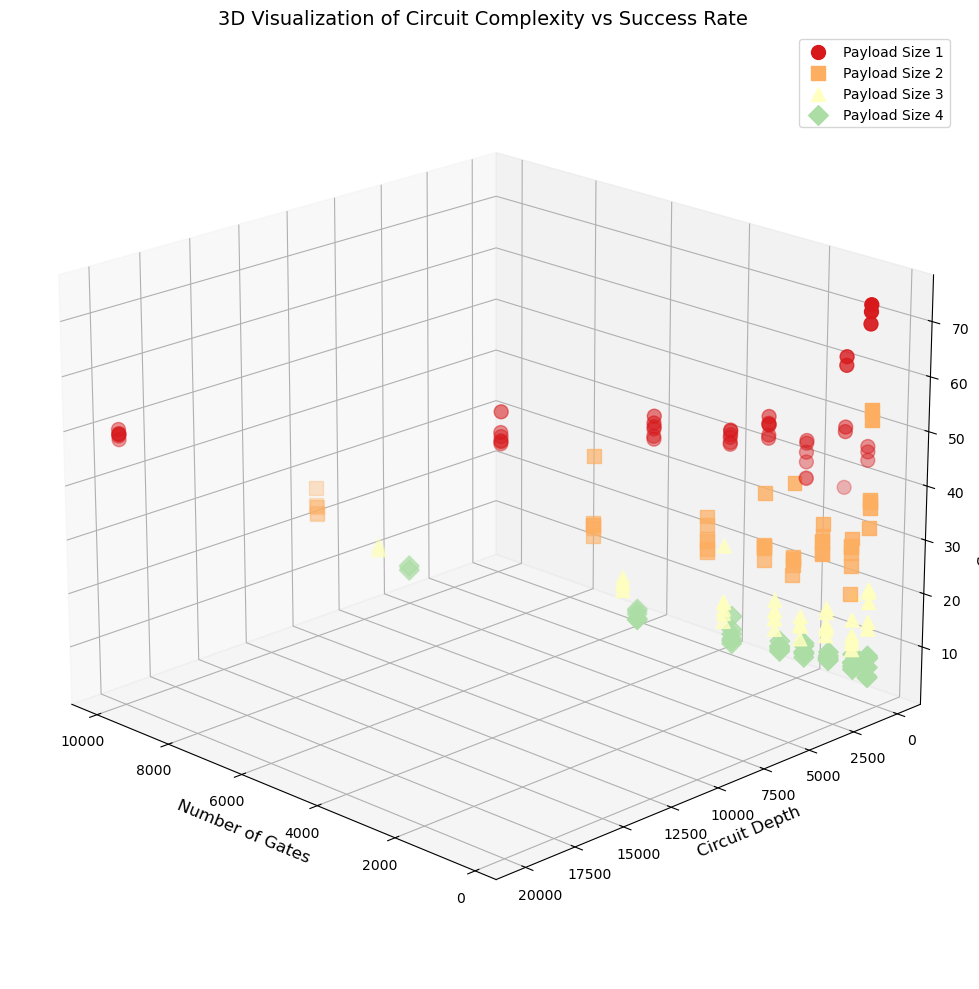

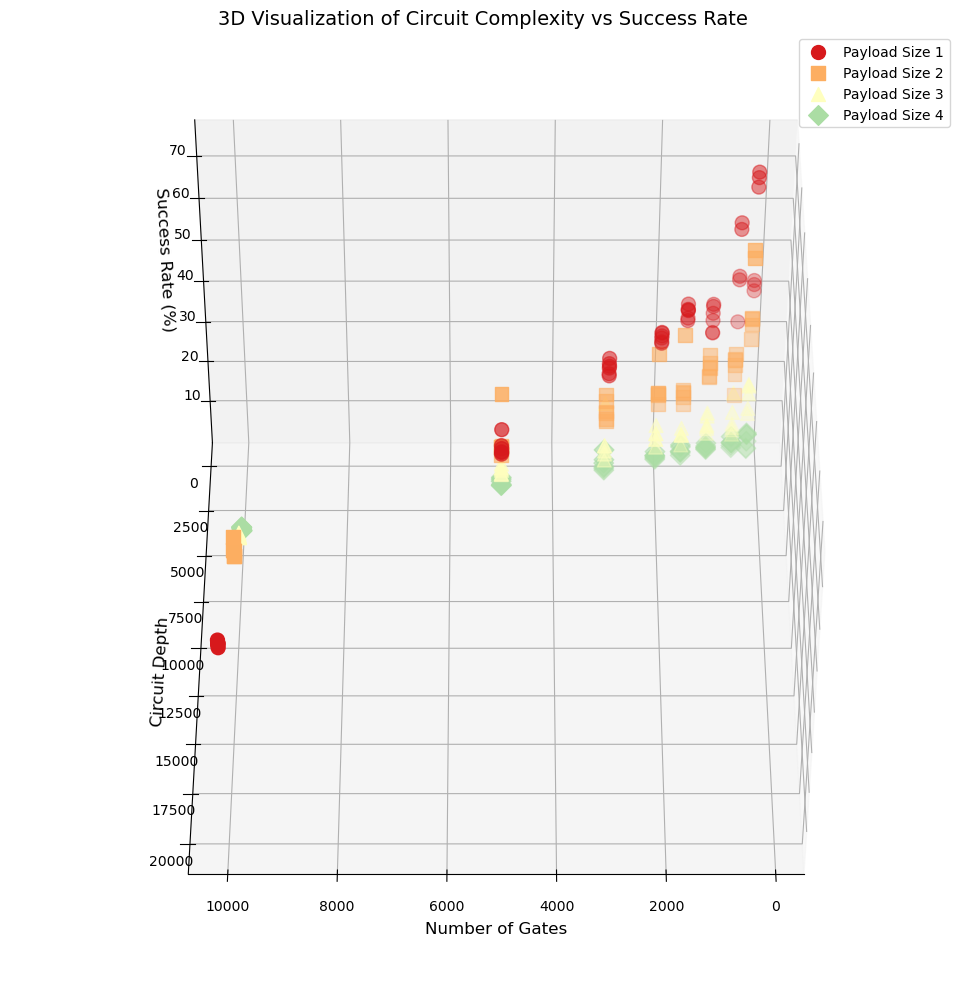

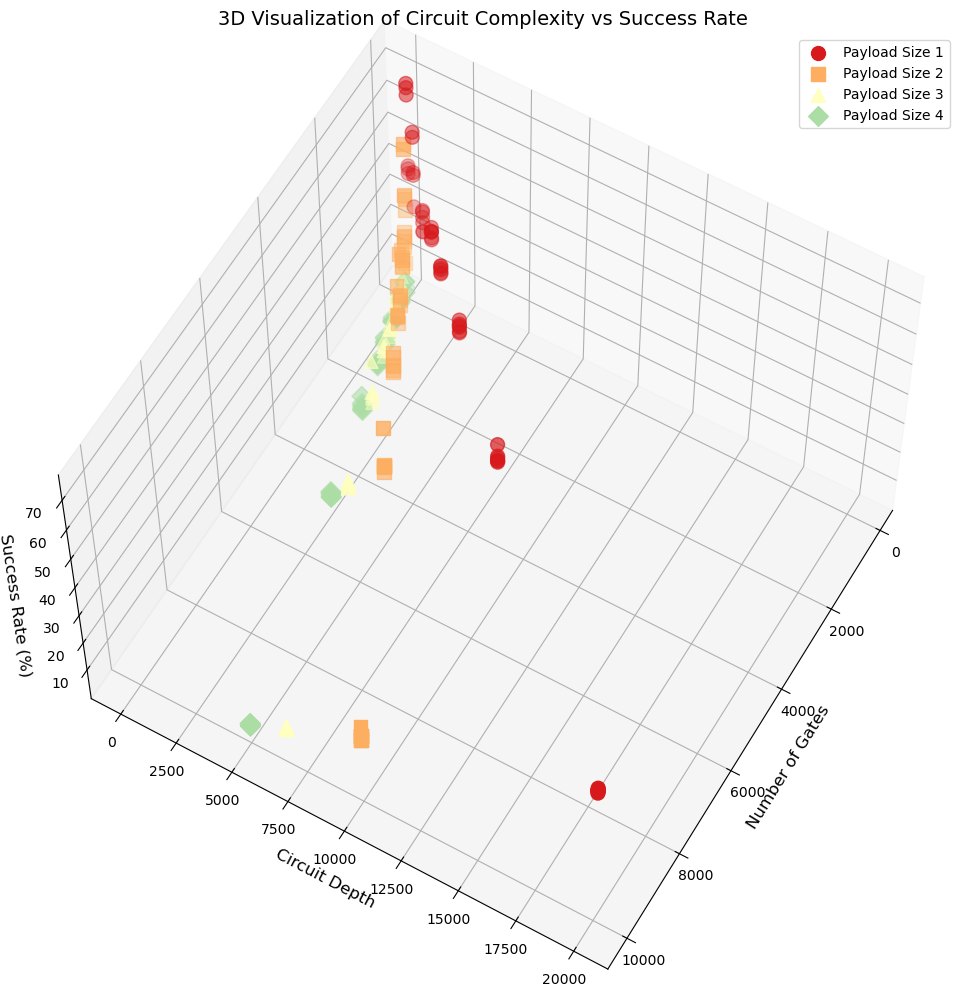

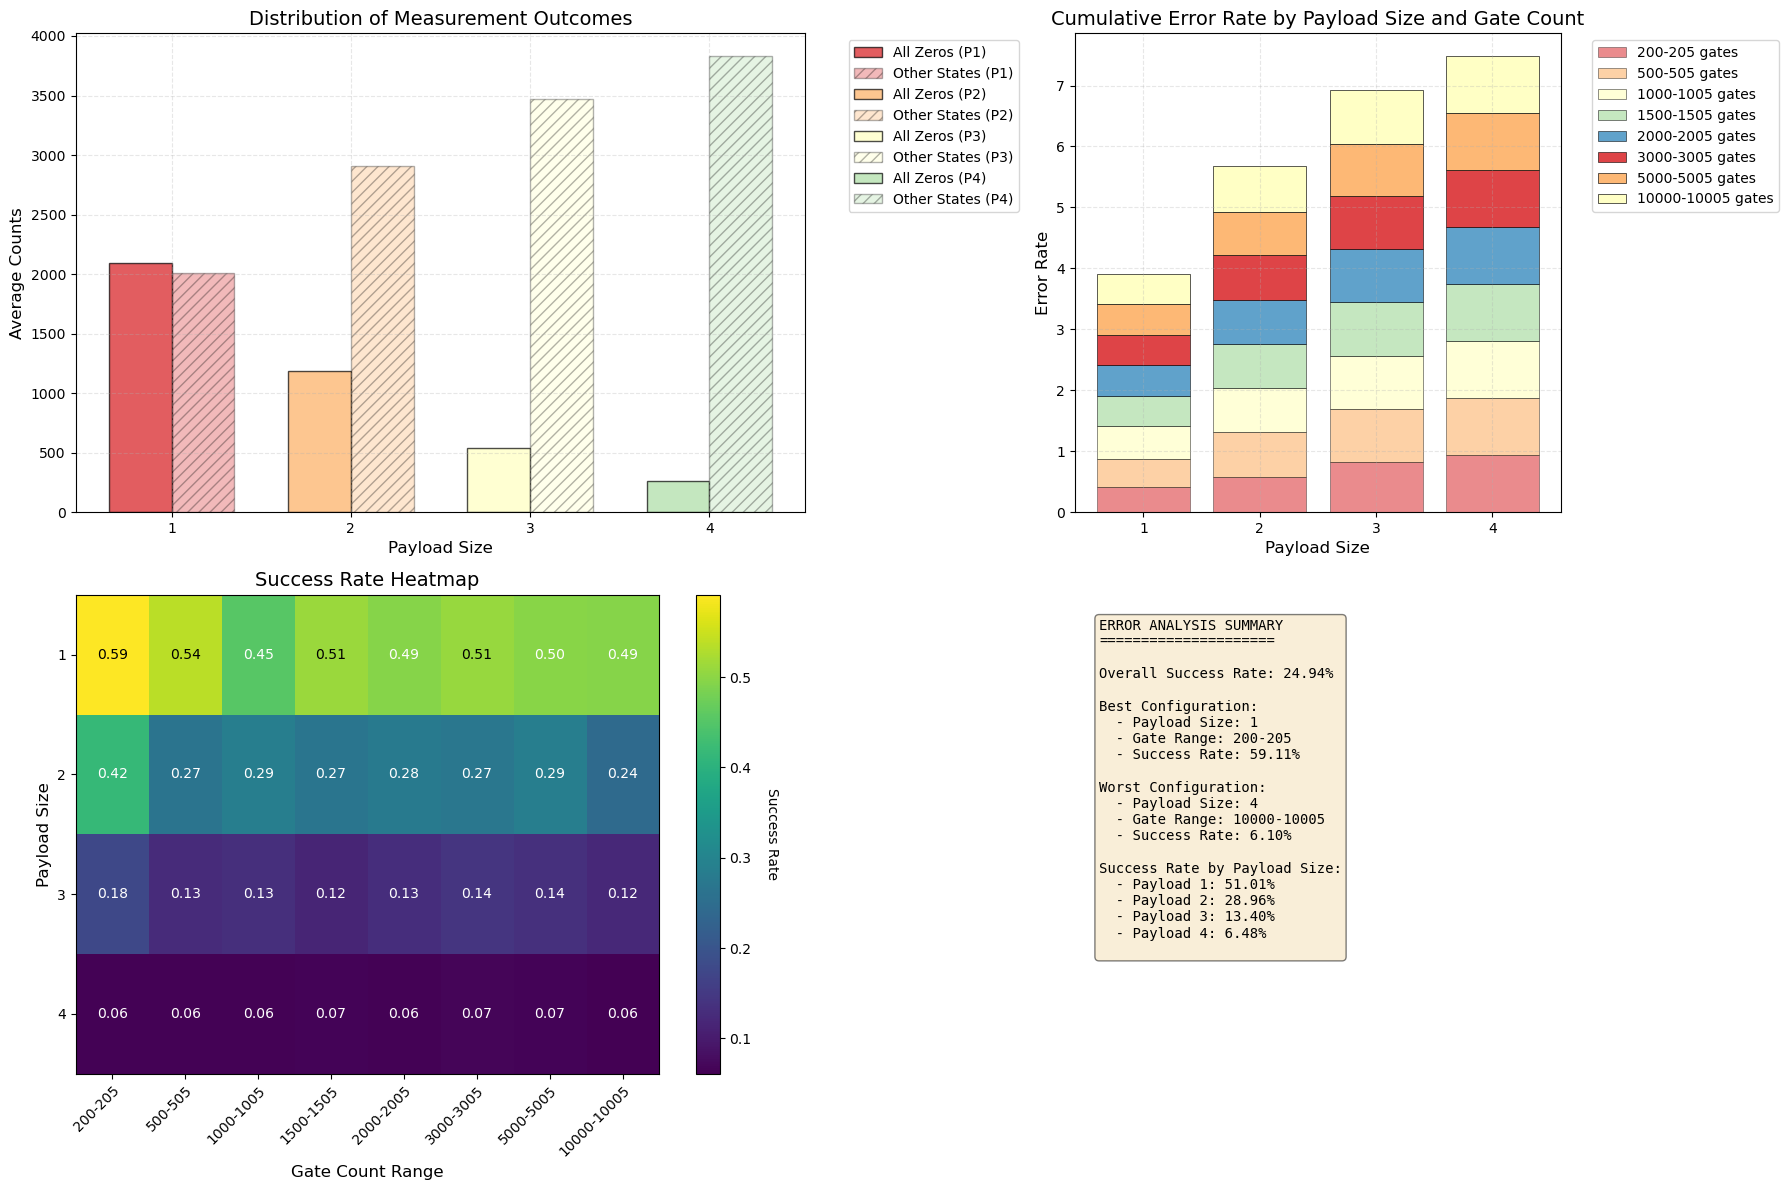

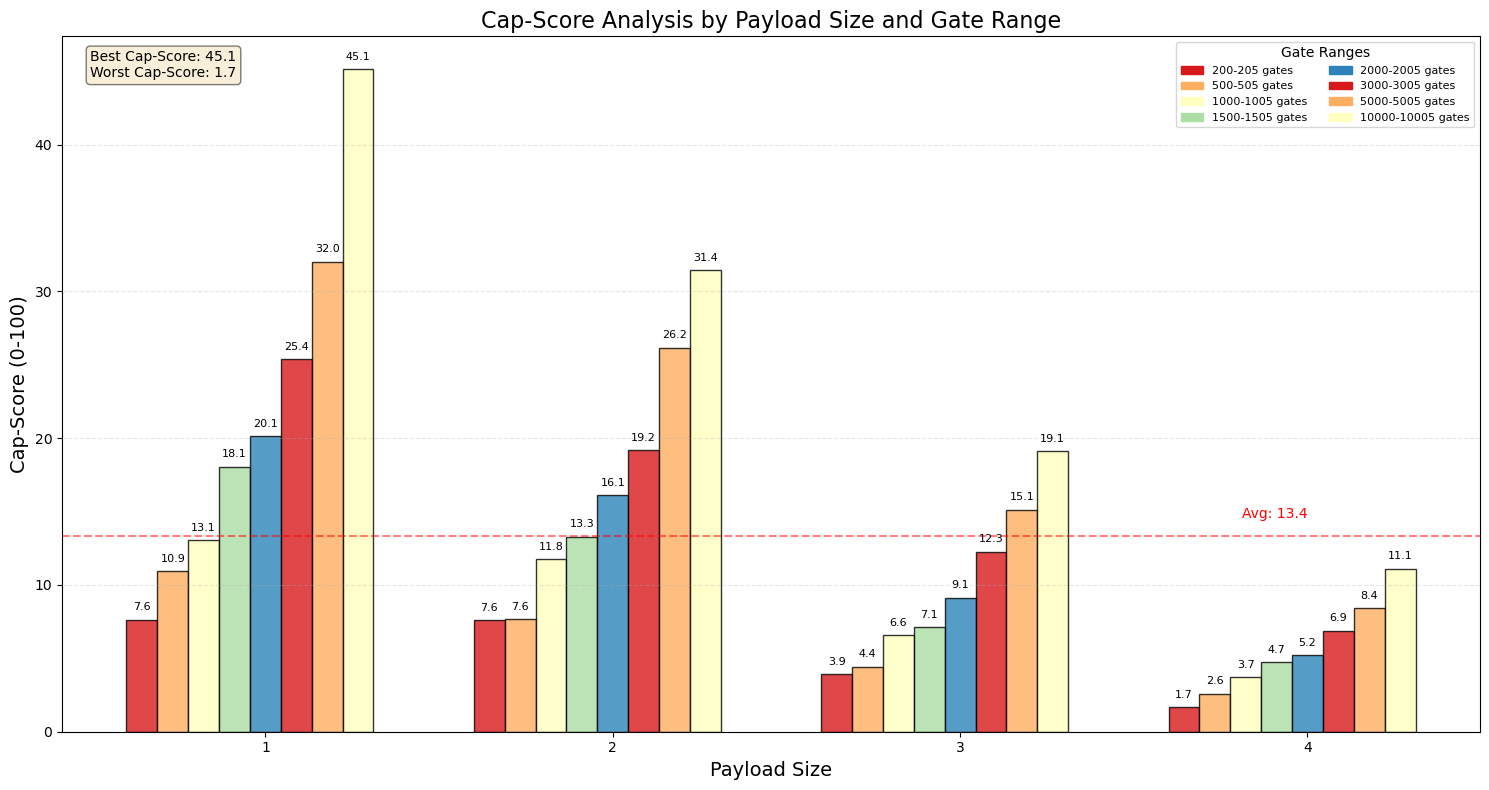

In [33]:
csv_files = [
    "experiment_results_dynamic_1-5_200-205_20250304_113951.csv",
    "experiment_results_dynamic_1-4_500-505_20250304_114048.csv",
    "experiment_results_dynamic_1-4_1000-1005_20250304_114148.csv",
    "experiment_results_dynamic_1-4_1500-1505_20250304_114253.csv",
    "experiment_results_dynamic_1-4_2000-2005_20250304_114351.csv",
    "experiment_results_dynamic_1-4_3000-3005_20250304_001617_updated.csv",
    "experiment_results_dynamic_1-4_5000-5005_20250306_131017_updated.csv",
    "experiment_results_dynamic_1-2_10000-10005_20250306_234959_updated.csv",
]


# Create the DataFrame from multiple CSV files
df = create_experiment_dataframe(csv_files)

# Filter to include only payload sizes up to 4 qubits
df = df[df['payload_size'] <= 4]

# Display basic information about the dataset
# print("\nDataFrame Info:")
# print(df.info())

print("\nPayload size distribution:")
print(df.groupby('payload_size').size())

# Show counts distribution for each payload size
print("\nCounts distribution by payload size:")
for size in sorted(df['payload_size'].unique()):
    subset = df[df['payload_size'] == size]
    print(f"\nPayload size {size}:")
    print(f"Average counts_zeros: {subset['counts_zeros'].mean():.2f}")
    print(f"Average counts_ones: {subset['counts_ones'].mean():.2f}")

# Create all three versions of the plot
print("\nRegression Statistics (Linear Scale):")
print("-"*50)
regression_stats = plot_success_rates(df, use_log_x=False, use_log_y=False)
for stats in regression_stats:
    print(f"\nPayload Size {stats['payload_size']}:")
    print(f"Slope: {stats['slope']:.2e} ± {stats['std_err']:.2e}")
    print(f"Intercept: {stats['intercept']:.2f}")
    print(f"R²: {stats['r_squared']:.3f}")
    print(f"p-value: {stats['p_value']:.2e}")
    print("-"*50)


print("\nRegression Statistics (Log X Scale):")
print("-"*50)
regression_stats_logx = plot_success_rates(df, use_log_x=True, use_log_y=False)
for stats in regression_stats_logx:
    print(f"\nPayload Size {stats['payload_size']}:")
    print(f"Slope: {stats['slope']:.2e} ± {stats['std_err']:.2e}")
    print(f"Intercept: {stats['intercept']:.2f}")
    print(f"R²: {stats['r_squared']:.3f}")
    print(f"p-value: {stats['p_value']:.2e}")
    print("-"*50)

print("\nRegression Statistics (Log-Log Scale):")
print("-"*50)
regression_stats_logxy = plot_success_rates(df, use_log_x=True, use_log_y=True)
for stats in regression_stats_logxy:
    print(f"\nPayload Size {stats['payload_size']}:")
    print(f"Slope: {stats['slope']:.2e} ± {stats['std_err']:.2e}")
    print(f"Intercept: {stats['intercept']:.2f}")
    print(f"R²: {stats['r_squared']:.3f}")
    print(f"p-value: {stats['p_value']:.2e}")
    print("-"*50)

# Add circuit complexity analysis
print("\nGenerating Circuit Complexity Analysis Plots...")
plot_circuit_complexity(df)
print("Circuit complexity plots saved as:")
print("- 'circuit_complexity_2d.png'")
print("- 'circuit_complexity_3d_view1.png' (Default view)")
print("- 'circuit_complexity_3d_view2.png' (Rotated 90 degrees)")
print("- 'circuit_complexity_3d_view3.png' (Top-down view)")
print("- 'circuit_complexity_3d_view4.png' (Higher elevation)")

# Add error analysis
print("\nGenerating Error Analysis Plots...")
plot_error_analysis(df)
print("Error analysis plots saved as 'error_analysis.png'")

# Add Cap-score analysis
print("\nGenerating Cap-score Analysis Plot...")
plot_cap_scores(df)
print("Cap-score analysis plot saved as 'cap_scores_analysis.png'")


Generating Circuit Depth Analysis Plots...
Circuit depth analysis plots saved as:
- 'circuit_depth_analysis.png'
- 'depth_cap_scores_analysis.png'


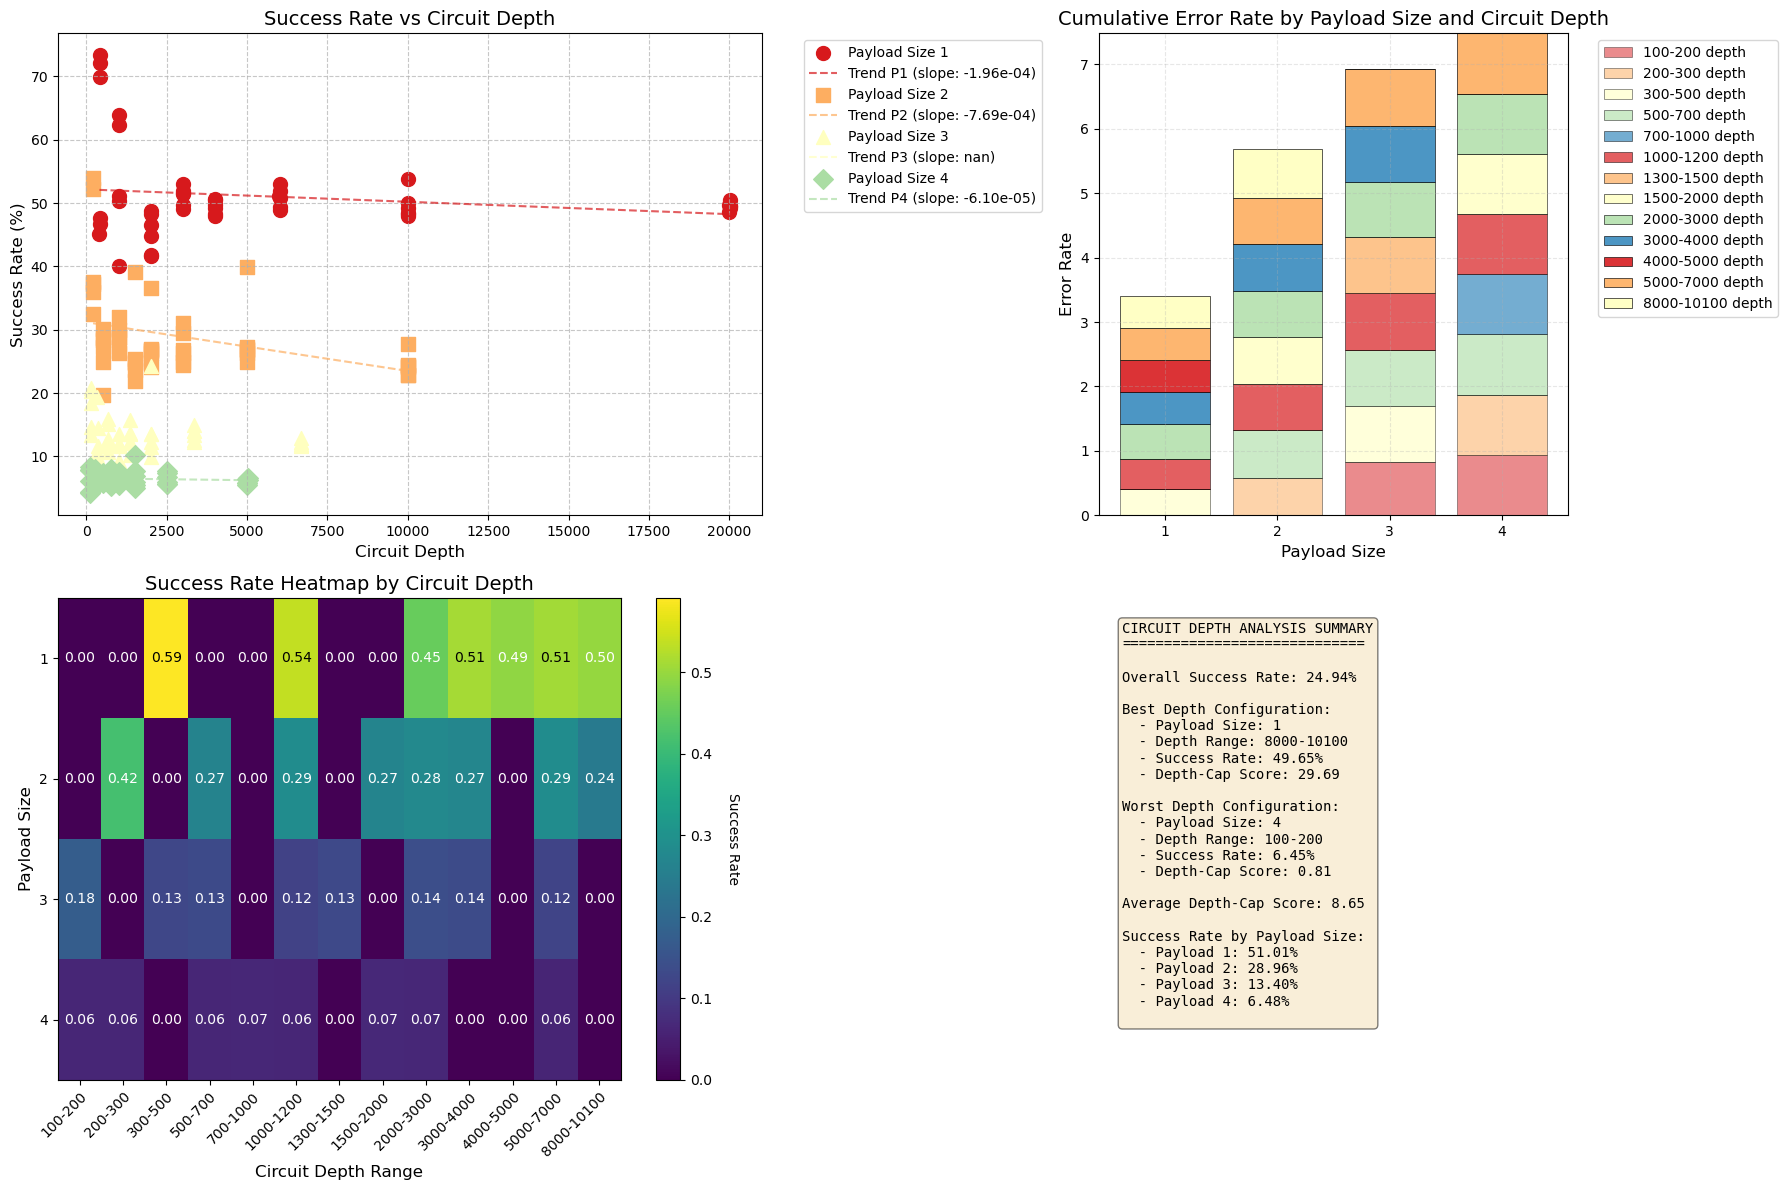

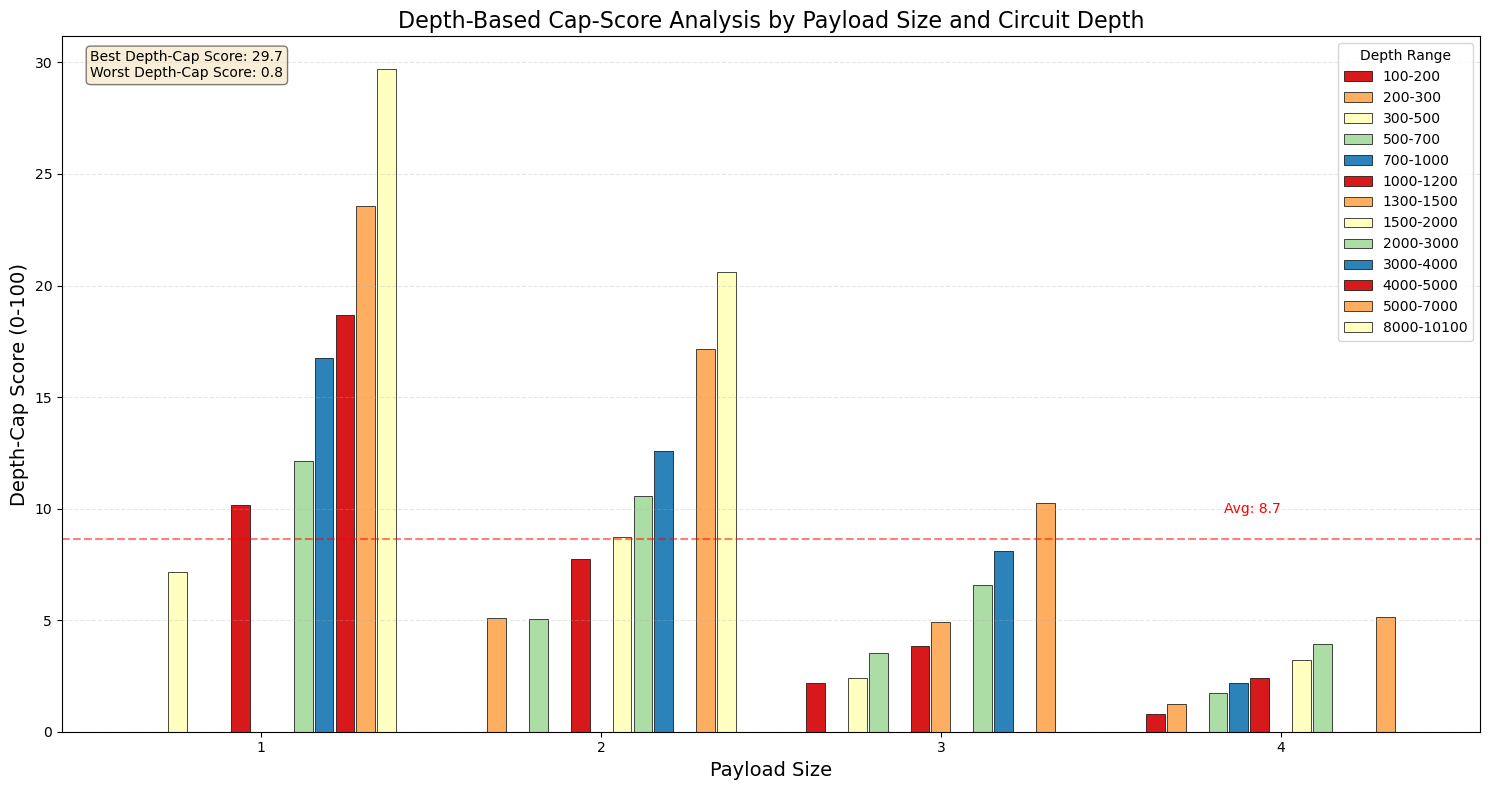

In [32]:
from results.experiment_analysis import plot_depth_analysis

csv_files = [
   "experiment_results_dynamic_1-5_200-205_20250304_113951.csv",
    "experiment_results_dynamic_1-4_500-505_20250304_114048.csv",
    "experiment_results_dynamic_1-4_1000-1005_20250304_114148.csv",
    "experiment_results_dynamic_1-4_1500-1505_20250304_114253.csv",
    "experiment_results_dynamic_1-4_2000-2005_20250304_114351.csv",
    "experiment_results_dynamic_1-4_3000-3005_20250304_001617_updated.csv",
    "experiment_results_dynamic_1-4_5000-5005_20250306_131017_updated.csv",
    "experiment_results_dynamic_1-2_10000-10005_20250306_234959_updated.csv",
]

# Create the DataFrame from multiple CSV files
df = create_experiment_dataframe(csv_files)
df = df[df['payload_size'] <= 4]

print("\nGenerating Circuit Depth Analysis Plots...")
plot_depth_analysis(df)
print("Circuit depth analysis plots saved as:")
print("- 'circuit_depth_analysis.png'")
print("- 'depth_cap_scores_analysis.png'")